Looking at race distributions within fields with low gender diversity among graduate students.

In [2]:
from collections import defaultdict
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TOTALS = pickle.load(open('../../data/Detailed_Sex_RaceEthnicity_Graduates.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())
race_ethnicities = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'][ fields[0] ]['Female'].keys())
race_ethnicities.remove('Total for selected values')

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

Data set describes years 1994 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [40]:
def subplots(num=len(institutions), sharey=False):
    cols = 2
    rows = math.ceil(num / 2)
    return plt.subplots(rows, cols, figsize=(10 * cols, 10 * rows), sharey=sharey)

def stack_field_races(ax, field, sex='Total for selected values'):
    stacks = {r: [] for r in race_ethnicities}

    for year in years:
        try:
            field_stats = TOTALS[year]['Columbia University in the City of New York'][field]
        except KeyError:
            [stacks[r].append(0) for r in race_ethnicities]
            continue
        for r in race_ethnicities:
            if sex == 'Total for selected values':
                prop = field_stats['Female'].get(r, 0) + field_stats['Male'].get(r, 0) # / field_stats['Total for selected values']['Total for selected values']
            else:
                prop = field_stats[sex].get(r, 0) # / field_stats[sex]['Total for selected values']
            stacks[r].append(prop)
    
    ax.stackplot(years, stacks.values(), labels=stacks.keys())
    
    ax.set_title(field + ', ' + sex)
    ax.set_xlabel('Year')
    ax.legend(loc='lower left')

    # Format y tick labels to be percentages
    # vals = ax.get_yticks()
    # ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

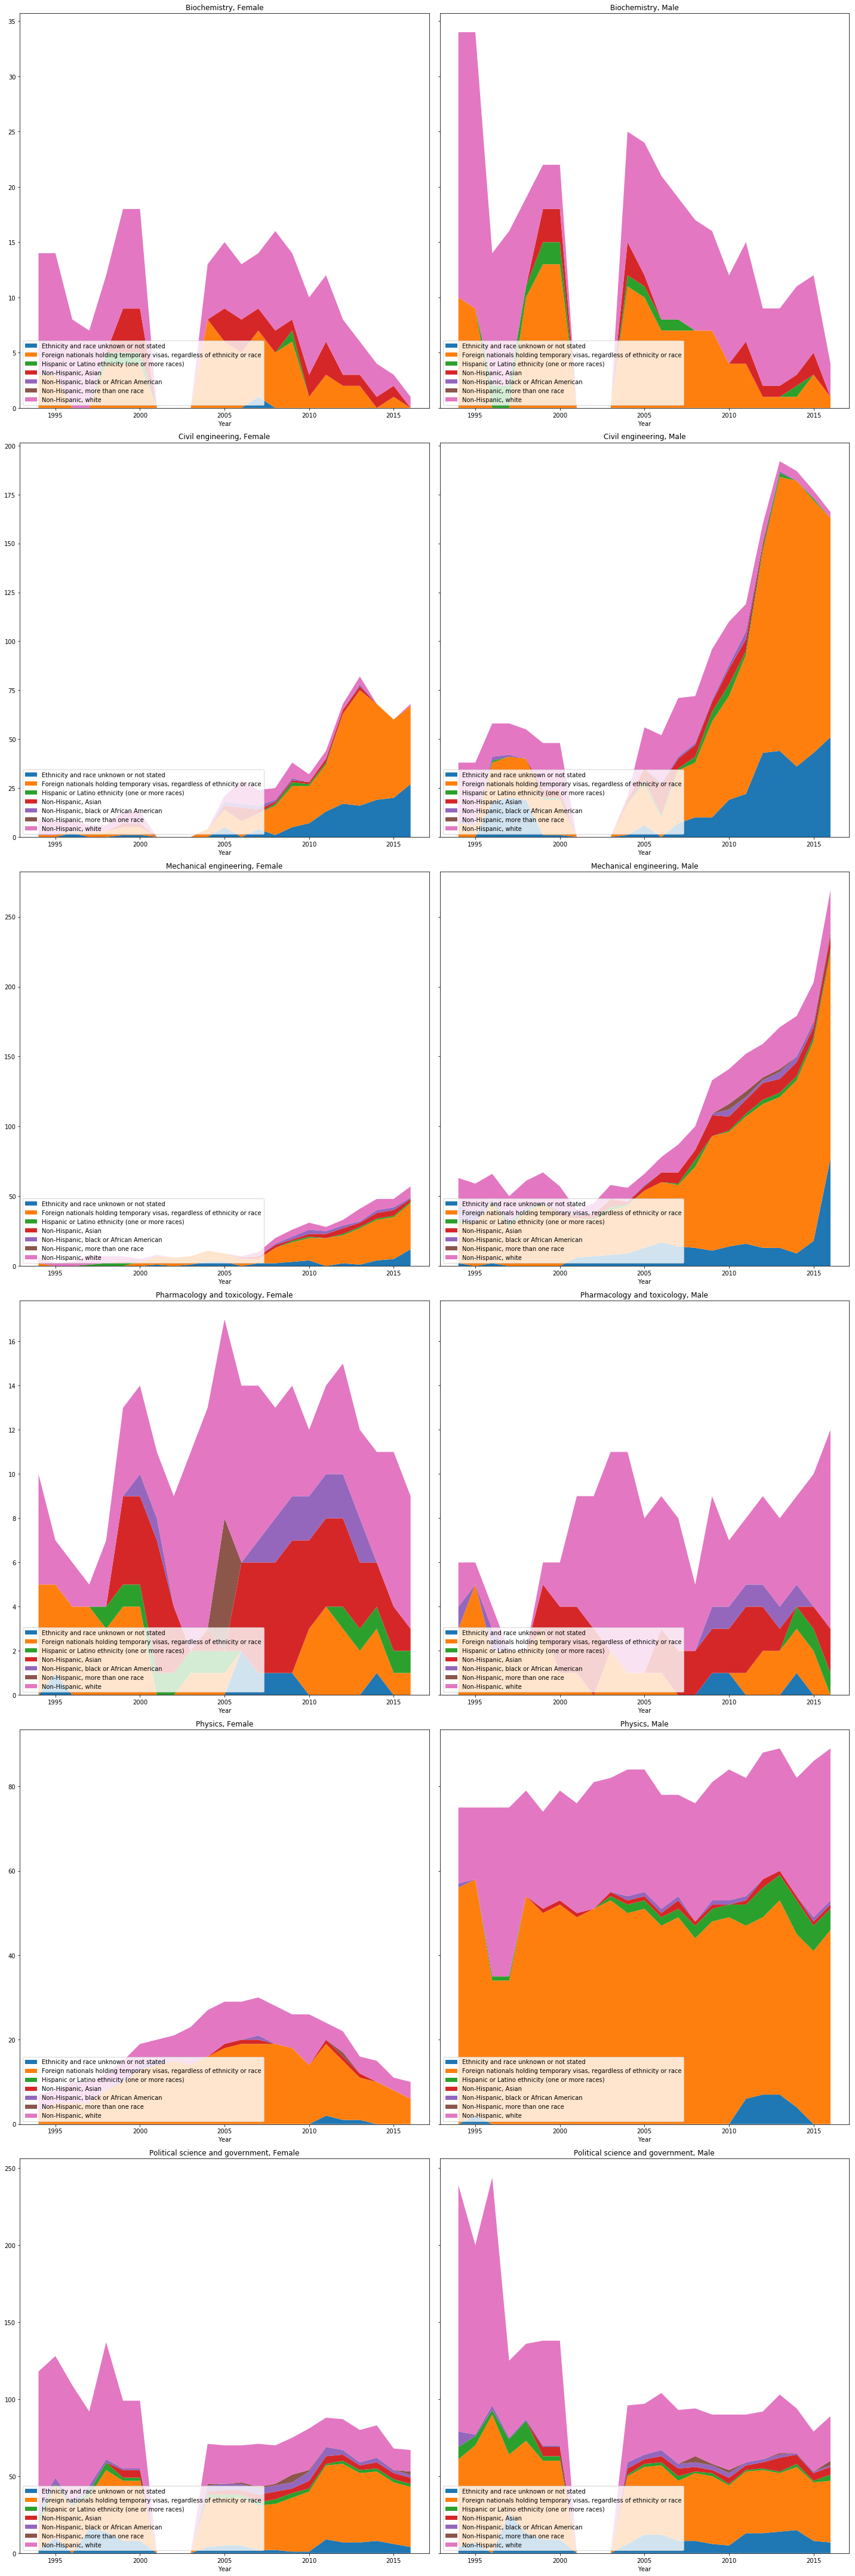

In [41]:
selected_fields = [
    'Biochemistry',
    'Civil engineering',
    'Mechanical engineering',
    'Pharmacology and toxicology',
    'Physics',
    'Political science and government',
]

fig, ax = subplots(num=len(selected_fields) * 2, sharey='row')
for i, field in enumerate(selected_fields):
    stack_field_races(ax[i, 0], field, sex='Female')
    stack_field_races(ax[i, 1], field, sex='Male')
fig.tight_layout()